## Data Loading

In [1]:
#import packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
filenames = ['2005_ERCOT_Hourly_Load_Data.xls', '2006_ERCOT_Hourly_Load_Data.xls', '2007_ERCOT_Hourly_Load_Data.xls',
             '2008_ERCOT_Hourly_Load_Data.xls', '2009_ERCOT_Hourly_Load_Data.xls', '2010_ERCOT_Hourly_Load_Data.xls',
             '2011_ERCOT_Hourly_Load_Data.xls', '2012_ERCOT_Hourly_Load_Data.xls', '2013_ERCOT_Hourly_Load_Data.xls',
             '2014_ERCOT_Hourly_Load_Data.xls', 'native_Load_2015.xls', 'native_Load_2016.xlsx', 
             'native_Load_2017.xlsx', 'Native_Load_2018.xlsx', 'Native_Load_2019.xlsx', 'Native_Load_2020.xlsx',
             'Native_Load_2021.xlsx']
  
energy_df = [] 
for filename in filenames: 
    energy_df.append(pd.read_excel(filename))

In [3]:
energy_df = pd.concat(energy_df)

In [4]:
energy_df.tail()

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT,Hour Ending,FWEST,NCENT,SOUTH,SCENT,HourEnding
1411,NaT,11553.984309,1551.184800,NaN,756.994250,NaN,NaN,NaN,1187.953148,40323.958388,02/28/2021 20:00,3208.558329,11970.998314,3554.206364,6540.078874,NaN
1412,NaT,11356.550304,1517.474556,NaN,760.008862,NaN,NaN,NaN,1182.662105,39717.792981,02/28/2021 21:00,3242.250237,11850.033701,3467.525621,6341.287594,NaN
1413,NaT,10988.645055,1441.576343,NaN,742.760101,NaN,NaN,NaN,1156.850330,38432.480182,02/28/2021 22:00,3263.385386,11474.356018,3337.811495,6027.095453,NaN
1414,NaT,10391.091274,1337.289562,NaN,708.352204,NaN,NaN,NaN,1117.967778,36406.502356,02/28/2021 23:00,3247.503586,10819.308318,3150.145637,5634.843997,NaN
1415,NaT,9765.073302,1234.143078,NaN,684.703823,NaN,NaN,NaN,1069.346044,34218.320389,02/28/2021 24:00,3215.331874,10195.398007,2922.537279,5131.786982,NaN


In [5]:
energy_list = ['Hour_End', 'ERCOT', 'Hour Ending', 'HourEnding']
df = energy_df.loc[:, energy_list]

In [6]:
df[df['Hour_End'].isna()]

,Hour_End,ERCOT,Hour Ending,HourEnding
0,NaT,29420.635691,01/01/2017 01:00,NaN
1,NaT,28870.813551,01/01/2017 02:00,NaN
2,NaT,28211.724078,01/01/2017 03:00,NaN
3,NaT,27820.288047,01/01/2017 04:00,NaN
4,NaT,27628.955677,01/01/2017 05:00,NaN
...,...,...,...,...
1411,NaT,40323.958388,02/28/2021 20:00,NaN
1412,NaT,39717.792981,02/28/2021 21:00,NaN
1413,NaT,38432.480182,02/28/2021 22:00,NaN
1414,NaT,36406.502356,02/28/2021 23:00,NaN


In [7]:
df['Hour_End'] = df['Hour_End'].fillna(df['HourEnding'])
df.drop('HourEnding', axis=1, inplace=True)

In [8]:
df['Hour_End'] = df['Hour_End'].fillna(df['Hour Ending'])
df.drop('Hour Ending', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141672 entries, 0 to 1415
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Hour_End  141672 non-null  object 
 1   ERCOT     141671 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


In [10]:
df[df['ERCOT'].isna()]

,Hour_End,ERCOT
7463,2016-11-07 00:00:00,NaN


In [11]:
df.drop('Hour_End', axis=1, inplace=True)

In [12]:
dti = pd.date_range('2005-01-01 1:00', periods=141672, freq='H')
dti

DatetimeIndex(['2005-01-01 01:00:00', '2005-01-01 02:00:00',
               '2005-01-01 03:00:00', '2005-01-01 04:00:00',
               '2005-01-01 05:00:00', '2005-01-01 06:00:00',
               '2005-01-01 07:00:00', '2005-01-01 08:00:00',
               '2005-01-01 09:00:00', '2005-01-01 10:00:00',
               ...
               '2021-02-28 15:00:00', '2021-02-28 16:00:00',
               '2021-02-28 17:00:00', '2021-02-28 18:00:00',
               '2021-02-28 19:00:00', '2021-02-28 20:00:00',
               '2021-02-28 21:00:00', '2021-02-28 22:00:00',
               '2021-02-28 23:00:00', '2021-03-01 00:00:00'],
              dtype='datetime64[ns]', length=141672, freq='H')

In [13]:
dt = pd.DataFrame({'datetime': dti})
len(dt)

141672

In [14]:
df = dt.merge(df, on=dt.index)

In [15]:
df.set_index('datetime', inplace=True)

In [16]:
df.drop('key_0', inplace=True, axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141672 entries, 2005-01-01 01:00:00 to 2021-03-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ERCOT   141671 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [18]:
df = df.rename({'ERCOT': 'hourly_demand'}, axis=1)

In [19]:
df.head()

,hourly_demand
datetime,
2005-01-01 01:00:00,23715.488663
2005-01-01 02:00:00,22823.712923
2005-01-01 03:00:00,21882.924807
2005-01-01 04:00:00,21229.184273
2005-01-01 05:00:00,20940.912981


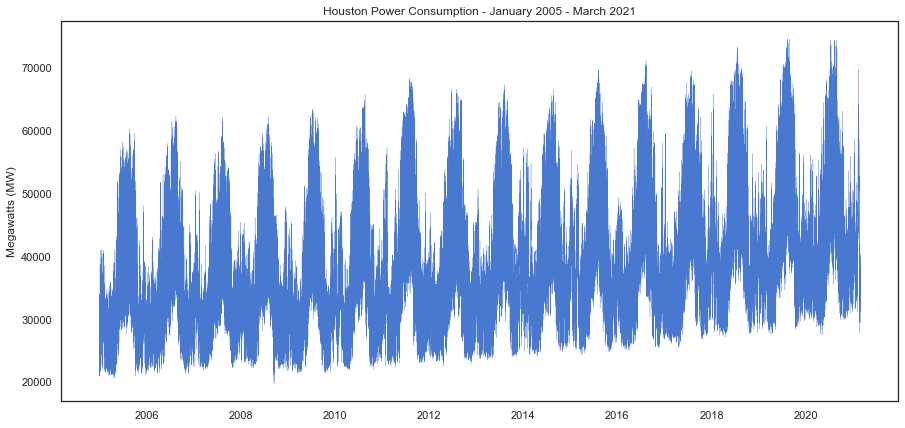

In [20]:
#plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df, linewidth=0.25)
ax.set_ylabel('Megawatts (MW)')
ax.set_title('Houston Power Consumption - January 2005 - March 2021')
plt.show();

## Data Imputing

In [21]:
df = df.fillna(method='ffill')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141672 entries, 2005-01-01 01:00:00 to 2021-03-01 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hourly_demand  141672 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


## Getting Additional Features

In [23]:
from meteostat import Stations

stations = Stations()
stations = stations.nearby(29.7604, -95.3698)
station = stations.fetch(1)

print(station)

                   name country region    wmo  icao  latitude  longitude  \
id                                                                         
72244  Houston / Olcott      US     TX  72244  KEFD   29.6073   -95.1587   

       elevation         timezone hourly_start hourly_end daily_start  \
id                                                                      
72244       10.0  America/Chicago   1950-01-09 2021-03-30  1930-08-01   

       daily_end      distance  
id                              
72244 2021-03-16  26564.718101  


In [24]:
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2002, 1, 1)
end = datetime(2021, 2, 28, 23, 59)

# Get hourly data
data = Hourly('72244', start, end)
data = data.fetch()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121352 entries, 2005-01-01 01:00:00 to 2021-02-28 23:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    121108 non-null  float64
 1   dwpt    120573 non-null  float64
 2   rhum    120573 non-null  float64
 3   prcp    1396 non-null    float64
 4   snow    0 non-null       float64
 5   wdir    96957 non-null   float64
 6   wspd    120685 non-null  float64
 7   wpgt    0 non-null       float64
 8   pres    1414 non-null    float64
 9   tsun    0 non-null       float64
 10  coco    3558 non-null    float64
dtypes: float64(11)
memory usage: 11.1 MB


In [26]:
data = data[['temp', 'dwpt', 'rhum', 'wspd']]

In [27]:
concat_df = pd.concat([df, data], axis=1, join='outer', sort=True)
concat_df.tail()

,hourly_demand,temp,dwpt,rhum,wspd
2021-02-28 20:00:00,40323.958388,27.0,21.1,70.0,30.0
2021-02-28 21:00:00,39717.792981,26.0,21.0,74.0,30.0
2021-02-28 22:00:00,38432.480182,25.0,21.1,79.0,24.0
2021-02-28 23:00:00,36406.502356,24.0,20.9,83.0,20.0
2021-03-01 00:00:00,34218.320389,NaN,NaN,NaN,NaN


In [28]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141672 entries, 2005-01-01 01:00:00 to 2021-03-01 00:00:00
Freq: H
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hourly_demand  141672 non-null  float64
 1   temp           121108 non-null  float64
 2   dwpt           120573 non-null  float64
 3   rhum           120573 non-null  float64
 4   wspd           120685 non-null  float64
dtypes: float64(5)
memory usage: 6.5 MB


In [29]:
gaps = concat_df[concat_df['temp'].isnull()].index.values
len(gaps)

20564

In [30]:
df = concat_df.copy()
interp_cols = ['temp', 'dwpt', 'rhum', 'wspd']
df[interp_cols] = df[interp_cols].interpolate(method='linear', limit_direction='forward', axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141672 entries, 2005-01-01 01:00:00 to 2021-03-01 00:00:00
Freq: H
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hourly_demand  141672 non-null  float64
 1   temp           141672 non-null  float64
 2   dwpt           141672 non-null  float64
 3   rhum           141672 non-null  float64
 4   wspd           141672 non-null  float64
dtypes: float64(5)
memory usage: 6.5 MB


In [31]:
def convert_f(temp):
    f = (9/5)*temp+32
    return(f)

In [32]:
df['temp'] = df.apply(lambda x : convert_f(df['temp']))
df['dwpt'] = df.apply(lambda x : convert_f(df['dwpt']))

In [33]:
def convert_mph(kh):
    mph = kh*0.621371
    return(mph)

In [34]:
df['wspd'] = df.apply(lambda x : convert_mph(df['wspd']))

In [35]:
df.head()

,hourly_demand,temp,dwpt,rhum,wspd
2005-01-01 01:00:00,23715.488663,64.4,64.4,100.0,4.722420
2005-01-01 02:00:00,22823.712923,64.4,64.4,100.0,6.959355
2005-01-01 03:00:00,21882.924807,64.4,64.4,100.0,5.840887
2005-01-01 04:00:00,21229.184273,62.6,62.6,100.0,8.077823
2005-01-01 05:00:00,20940.912981,62.6,62.6,100.0,4.722420


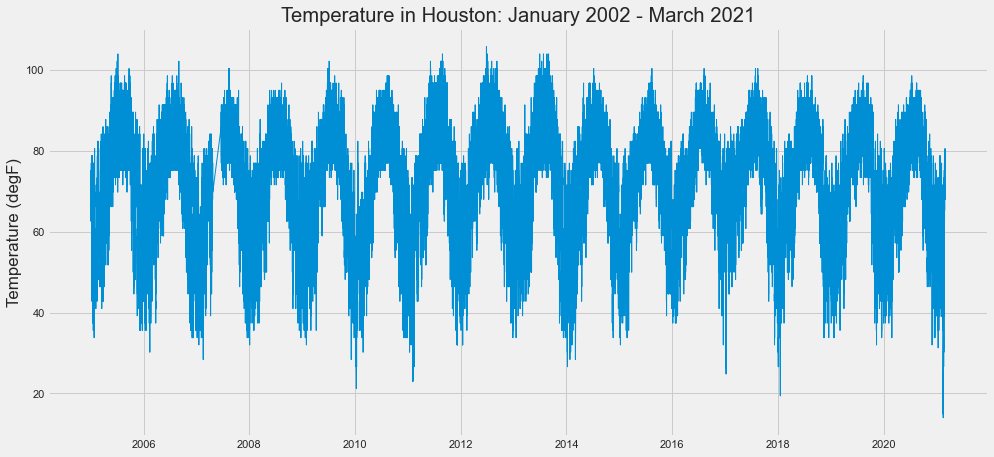

In [36]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df['temp'], linewidth=1)
ax.set_ylabel('Temperature (degF)')
ax.set_title('Temperature in Houston: January 2002 - March 2021')
plt.show();

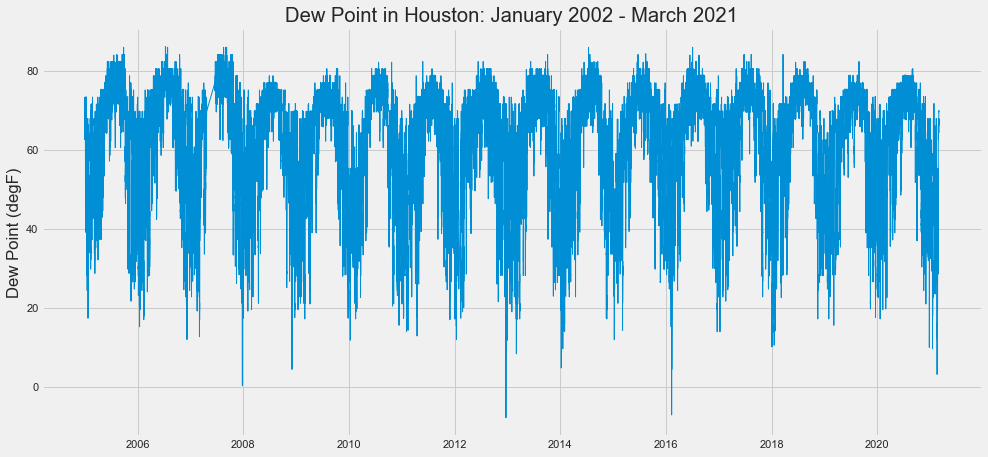

In [37]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df['dwpt'], linewidth=1)
ax.set_ylabel('Dew Point (degF)')
ax.set_title('Dew Point in Houston: January 2002 - March 2021')
plt.show();

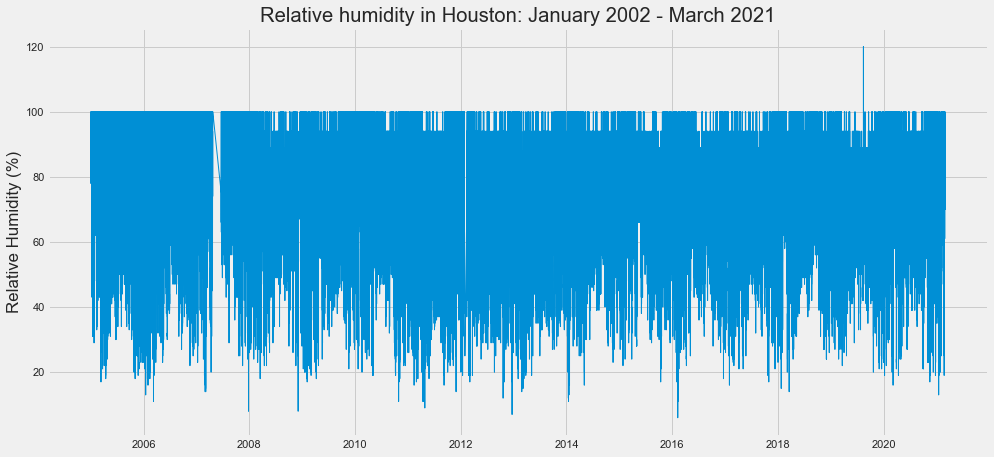

In [38]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df['rhum'], linewidth=1)
ax.set_ylabel('Relative Humidity (%)')
ax.set_title('Relative humidity in Houston: January 2002 - March 2021')
plt.show();

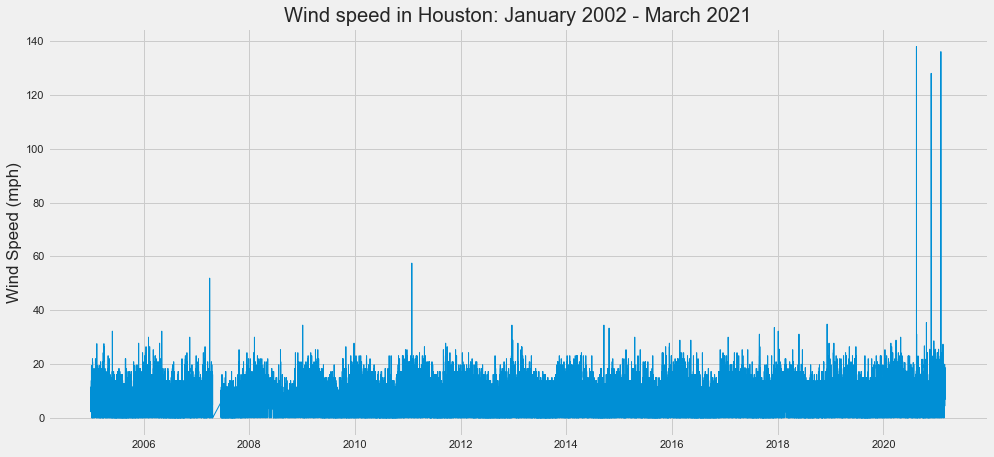

In [39]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df['wspd'], linewidth=1)
ax.set_ylabel('Wind Speed (mph)')
ax.set_title('Wind speed in Houston: January 2002 - March 2021')
plt.show();

In [40]:
features_df = df.copy(deep=True)
features_df['hour_of_day'] = features_df.index.hour
features_df['year'] = features_df.index.year
features_df['month'] = features_df.index.month
features_df['day_of_week'] = features_df.index.dayofweek
features_df['day_of_year'] = features_df.index.dayofyear
features_df['week_of_year'] = features_df.index.weekofyear
features_df['quarter'] = features_df.index.quarter

features_df.head()

,hourly_demand,temp,dwpt,rhum,wspd,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter
2005-01-01 01:00:00,23715.488663,64.4,64.4,100.0,4.722420,1,2005,1,5,1,53,1
2005-01-01 02:00:00,22823.712923,64.4,64.4,100.0,6.959355,2,2005,1,5,1,53,1
2005-01-01 03:00:00,21882.924807,64.4,64.4,100.0,5.840887,3,2005,1,5,1,53,1
2005-01-01 04:00:00,21229.184273,62.6,62.6,100.0,8.077823,4,2005,1,5,1,53,1
2005-01-01 05:00:00,20940.912981,62.6,62.6,100.0,4.722420,5,2005,1,5,1,53,1


In [41]:
import holidays

In [42]:
hols = holidays.US(state='TX') # default is ontario Holidays
print(features_df.loc['2020-07-04'].index.date[0] in hols)
print(features_df.loc['2018-08-01'].index.date[0] in hols)

True
False


In [43]:
features_df['stat_hol'] = pd.Series(features_df.index.date).apply(lambda x: x in hols).values
features_df.head()

,hourly_demand,temp,dwpt,rhum,wspd,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol
2005-01-01 01:00:00,23715.488663,64.4,64.4,100.0,4.722420,1,2005,1,5,1,53,1,True
2005-01-01 02:00:00,22823.712923,64.4,64.4,100.0,6.959355,2,2005,1,5,1,53,1,True
2005-01-01 03:00:00,21882.924807,64.4,64.4,100.0,5.840887,3,2005,1,5,1,53,1,True
2005-01-01 04:00:00,21229.184273,62.6,62.6,100.0,8.077823,4,2005,1,5,1,53,1,True
2005-01-01 05:00:00,20940.912981,62.6,62.6,100.0,4.722420,5,2005,1,5,1,53,1,True


In [44]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141672 entries, 2005-01-01 01:00:00 to 2021-03-01 00:00:00
Freq: H
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hourly_demand  141672 non-null  float64
 1   temp           141672 non-null  float64
 2   dwpt           141672 non-null  float64
 3   rhum           141672 non-null  float64
 4   wspd           141672 non-null  float64
 5   hour_of_day    141672 non-null  int64  
 6   year           141672 non-null  int64  
 7   month          141672 non-null  int64  
 8   day_of_week    141672 non-null  int64  
 9   day_of_year    141672 non-null  int64  
 10  week_of_year   141672 non-null  int64  
 11  quarter        141672 non-null  int64  
 12  stat_hol       141672 non-null  bool   
dtypes: bool(1), float64(5), int64(7)
memory usage: 18.2 MB


In [45]:
feat_df = features_df.copy()

In [46]:
feat_df.drop(['temp', 'dwpt', 'rhum', 'wspd'], axis=1, inplace=True)

In [47]:
feat_df.head()

,hourly_demand,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol
2005-01-01 01:00:00,23715.488663,1,2005,1,5,1,53,1,True
2005-01-01 02:00:00,22823.712923,2,2005,1,5,1,53,1,True
2005-01-01 03:00:00,21882.924807,3,2005,1,5,1,53,1,True
2005-01-01 04:00:00,21229.184273,4,2005,1,5,1,53,1,True
2005-01-01 05:00:00,20940.912981,5,2005,1,5,1,53,1,True


In [56]:
final_df = features_df.join(features_df.groupby(by=['year', 'day_of_year'])['hourly_demand'].max(),
                       on=['year', 'day_of_year'], rsuffix='_peak_in_day_in_year')
final_df.rename(columns={'hourly_demand_peak_in_day_in_year': 'daily_peak'}, inplace=True)

In [57]:
final_df.head()

,hourly_demand,temp,dwpt,rhum,wspd,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol,daily_peak
2005-01-01 01:00:00,23715.488663,64.4,64.4,100.0,4.722420,1,2005,1,5,1,53,1,True,28637.089643
2005-01-01 02:00:00,22823.712923,64.4,64.4,100.0,6.959355,2,2005,1,5,1,53,1,True,28637.089643
2005-01-01 03:00:00,21882.924807,64.4,64.4,100.0,5.840887,3,2005,1,5,1,53,1,True,28637.089643
2005-01-01 04:00:00,21229.184273,62.6,62.6,100.0,8.077823,4,2005,1,5,1,53,1,True,28637.089643
2005-01-01 05:00:00,20940.912981,62.6,62.6,100.0,4.722420,5,2005,1,5,1,53,1,True,28637.089643


In [58]:
final_df.to_csv('final_df.csv')